<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/fakenewsdetedtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

<ipython-input-47-4afae490c6b1>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')
<ipython-input-47-4afae490c6b1>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')
<ipython-input-47-4afae490c6b1>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')


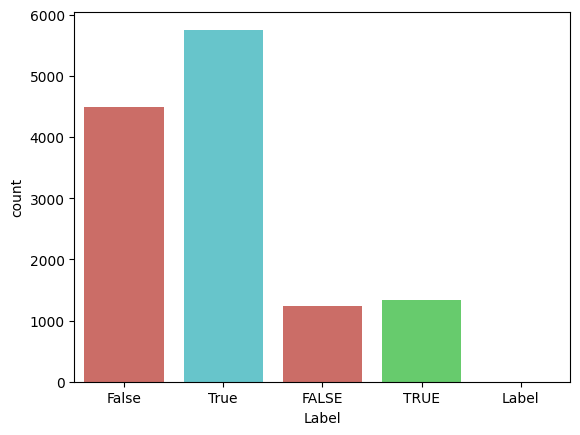

In [47]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov  4 12:00:49 2017

@author: NishitP
"""
import pandas as pd
import numpy as np
import nltk
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

# Reading data files
test_filename = '/content/drive/MyDrive/test.csv'
train_filename = '/content/drive/MyDrive/train.csv'
valid_filename = '/content/drive/MyDrive/valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)

# Data observation
def data_obs():
    print("Training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    print("Testing dataset size:")
    print(test_news.shape)
    print(test_news.head(10))

    print("Validation dataset size:")
    print(valid_news.shape)
    print(valid_news.head(10))

# Uncomment to check the data by calling the function
# data_obs()

# Distribution of classes for prediction
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# Checking distributions in training, test, and validation data
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)

# Data integrity check (missing label values)
def data_quality_check():
    print("Checking data quality...")

    print("Training data:")
    print(train_news.isnull().sum())
    print(train_news.info())

    print("Testing data:")
    print(test_news.isnull().sum())
    print(test_news.info())

    print("Validation data:")
    print(valid_news.isnull().sum())
    print(valid_news.info())

# Uncomment to run the data quality check
# data_quality_check()

# Stemming
eng_stemmer = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

def stem_tokens(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

# Process the data
def process_data(data, exclude_stopword=True, stem=True):
    tokens = [w.lower() for w in data]
    if stem:
        tokens = stem_tokens(tokens, eng_stemmer)
    if exclude_stopword:
        tokens = [w for w in tokens if w not in stopwords]
    return tokens

# Creating ngrams
# Unigram
def create_unigram(words):
    assert isinstance(words, list)
    return words

# Bigram
def create_bigrams(words):
    assert isinstance(words, list)
    skip = 0
    join_str = " "
    length = len(words)
    if length > 1:
        lst = []
        for i in range(length-1):
            for k in range(1, skip+2):
                if i+k < length:
                    lst.append(join_str.join([words[i], words[i+k]]))
    else:
        lst = create_unigram(words)
    return lst

# Trigram function was commented out due to errors, can be added if needed

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]




In [ ]:
train_df = pd.read_csv(r'/content/drive/MyDrive/train.csv')

In [ ]:
train_df.columns

Index(['Statement', 'Label'], dtype='object')

In [ ]:
train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
train_df.shape

(10240, 2)

In [ ]:
train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


<ipython-input-10-7cbe2432b945>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x=column_name, data=dataFile, palette='hls')


<Axes: xlabel='Label', ylabel='count'>

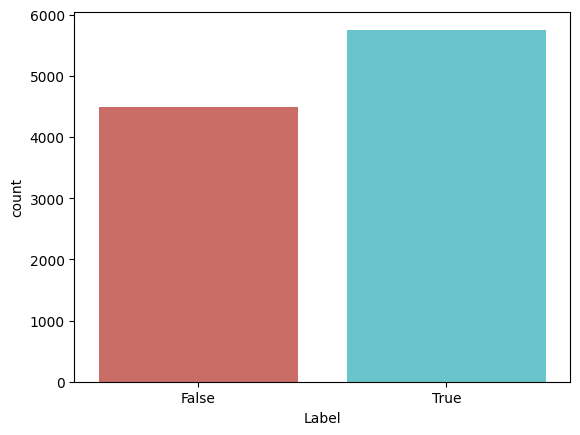

In [ ]:
def create_distribution(dataFile, column_name='Label'):
    if column_name not in dataFile.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    return sb.countplot(x=column_name, data=dataFile, palette='hls')

# Call the function with the correct column name
create_distribution(train_df, 'Label')



In [ ]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [ ]:
train_df = train_df.dropna()

In [ ]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [ ]:
train_df.shape

(10240, 2)

In [ ]:
train_df.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
train_df.reset_index(drop= True,inplace=True)

In [ ]:
train_df.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
label_train = train_df['Label']


Index(['Statement', 'Label'], dtype='object')
0    Says the Annies List political group supports ...
1    When did the decline of coal start? It started...
2    Hillary Clinton agrees with John McCain "by vo...
3    Health care reform legislation is likely to ma...
4    The economic turnaround started at the end of ...
5    The Chicago Bears have had more starting quart...
6    Jim Dunnam has not lived in the district he re...
7    I'm the only person on this stage who has work...
8    However, it took $19.5 million in Oregon Lotte...
9    Says GOP primary opponents Glenn Grothman and ...
Name: Statement, dtype: object
0    False
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
Name: Label, dtype: bool


<ipython-input-25-6b0e8ad5f6a6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x=column_name, data=dataFile, palette='hls')


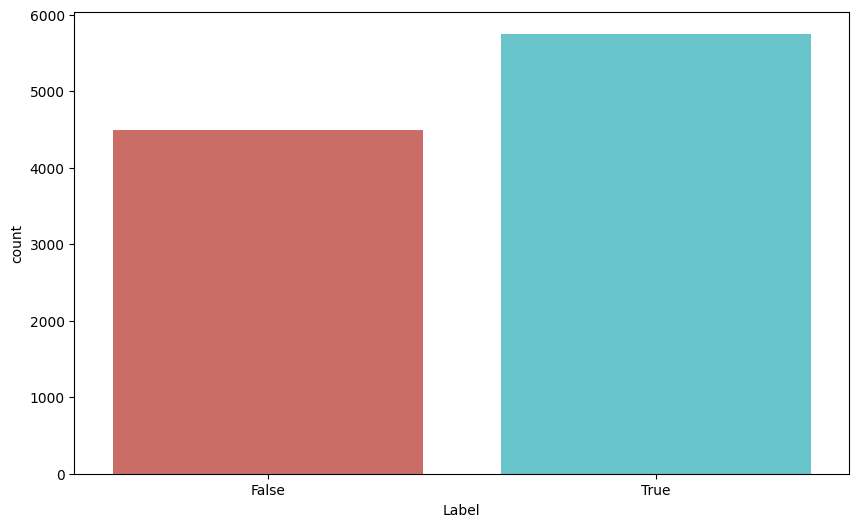

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming train_df is already defined, check the columns
print(train_df.columns)

# Access the 'Statement' and 'Label' columns correctly
statement_train = train_df['Statement']
label_train = train_df['Label']

# Display the first 10 rows of statement_train and label_train to ensure they're correctly defined
print(statement_train.head(10))
print(label_train.head(10))

# Define the function to create distribution
def create_distribution(dataFile, column_name='Label'):
    if column_name not in dataFile.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    return sb.countplot(x=column_name, data=dataFile, palette='hls')

# Call the function with the correct column name
plt.figure(figsize=(10, 6))  # Optional: set the figure size for better visualization
create_distribution(train_df, 'Label')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

# Print the first few stopwords to verify
print(stpwrds[:10])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

# Print the first few stopwords to verify
print(stpwrds[:10])

# Example processing function
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Lemmatize and remove stopwords
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stpwrds]
    # Join the processed tokens back into a string
    return ' '.join(processed_tokens)

# Apply the preprocessing to the 'Statement' column
train_df['Statement'] = train_df['Statement'].apply(preprocess_text)

# Display the first few rows to verify
print(train_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
                                           Statement  Label
0  say annies list political group support thirdt...  False
1  decline coal start started natural gas took st...   True
2  hillary clinton agrees john mccain voting give...   True
3  health care reform legislation likely mandate ...  False
4               economic turnaround started end term   True


In [ ]:
train_df['Statement'][2182]

'new york city murder'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['Statement'], label_train, test_size=0.3, random_state=1)

In [ ]:
X_train

3474    saysbarack obama voted language ofindianas rel...
6202                  say apple tim cook business indiana
5868    majority candidate stage supported amnesty nev...
7357          k home owner suicide attributed foreclosure
9514    thurbert baker kept teen jail didnt even commi...
                              ...                        
2895             u rep allen west want bring back earmark
7813                           oil drilling florida coast
905     last year weve put people back work advanced e...
5192       latin america economy almost big economy china
235                       say marco rubio one open border
Name: Statement, Length: 7168, dtype: object

In [ ]:
X_train.shape

(7168,)

In [ ]:

Y_train

3474     True
6202    False
5868     True
7357    False
9514    False
        ...  
2895    False
7813     True
905      True
5192     True
235     False
Name: Label, Length: 7168, dtype: bool

In [ ]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [ ]:
tfidf_X_train.shape

(7168, 9112)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 55.34%
Confusion matrix, without normalization


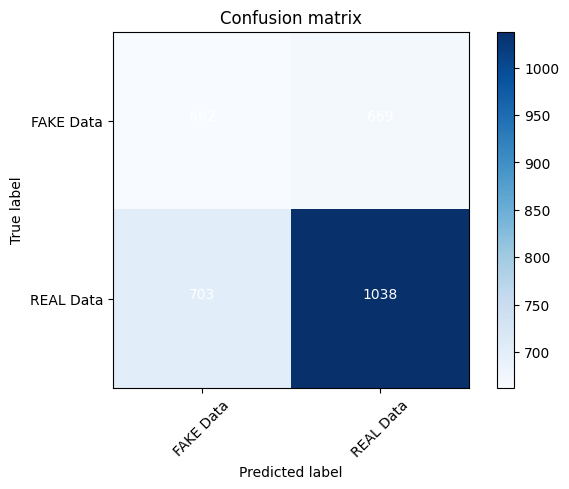

In [ ]:

Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])